In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import copy
import scipy
import random
from sklearn.metrics import confusion_matrix

## Importing Dataset

In [2]:
df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')

In [3]:
#have a look on the dataset
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratory data analysis (EDA)
Our Target Variable X is Churn. In this step, I will analyze the relationship between the Target Variable X and the other features.

In [6]:
#checking null values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There is no missing value in the dataset. Furthermore, all the columns are numerical values except 2 columns are string.

### Target Varibale: Chrun

In [8]:
df.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

As you can see, almost 80% of churn is 0 and 20 is 1

### Correlation

<AxesSubplot:>

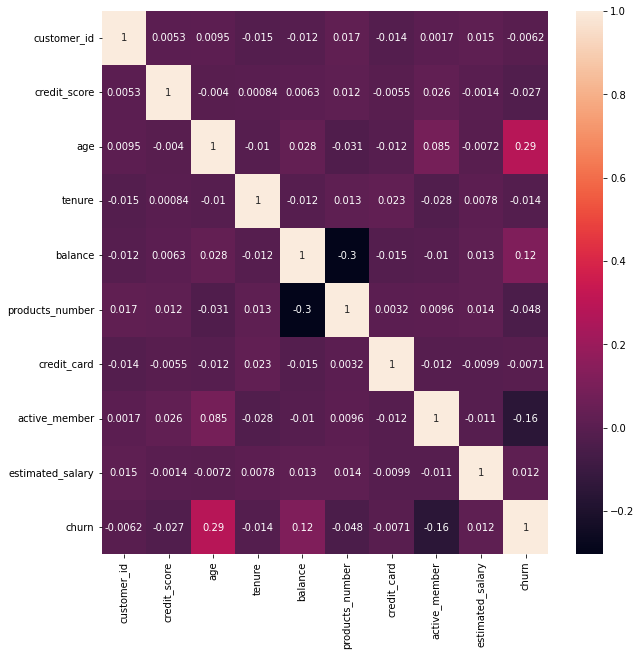

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True)

We can clearly see that age has the highest correlation with the target variable among all other features. Furthermore, we can say that balance has a high correltion with the churn compared to other features. As a conclusion, 'age' and 'balance' are correlated with 'churn' (target variable) 

### Age VS Chrun

<AxesSubplot:xlabel='age', ylabel='Count'>

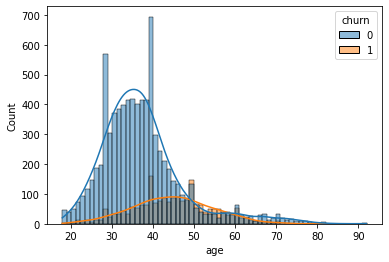

In [10]:
#age distribution
sns.histplot(data=df, x='age', hue='churn',kde=True)

In [11]:
#age and Target Variable
age_mean = df.groupby('age')['churn'].mean()
age_mean

age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: churn, Length: 70, dtype: float64

Text(0, 0.5, 'Churn Ratio')

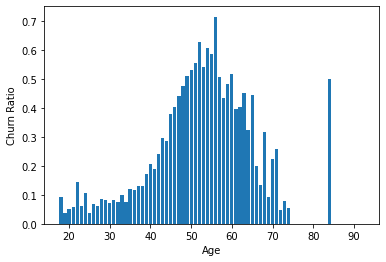

In [12]:
plt.bar(age_mean.index, age_mean.values)
plt.xlabel('Age')
plt.ylabel('Churn Ratio')

Churn ration is very high between ages of 50 and 60

### Balance & Churn

<AxesSubplot:xlabel='balance', ylabel='Count'>

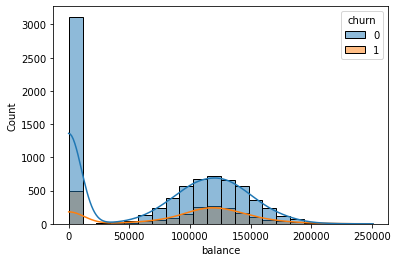

In [13]:
sns.histplot(data=df, x='balance',hue='churn',kde=True)

### Credit Score & Churn

<AxesSubplot:xlabel='churn', ylabel='credit_score'>

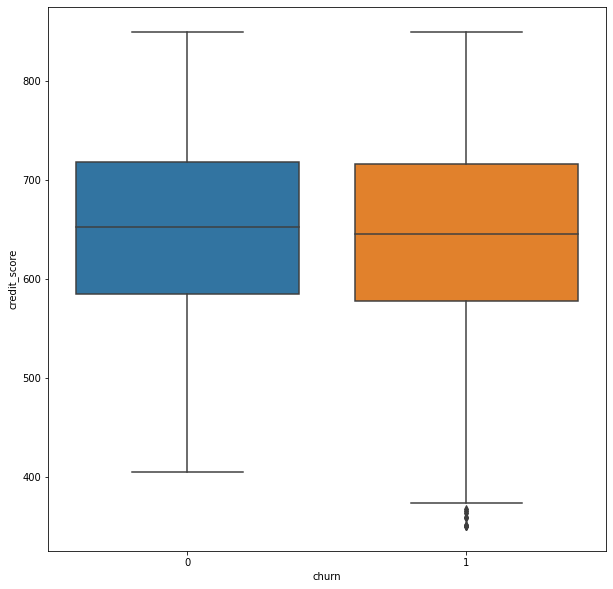

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x='churn',y='credit_score', data=df)

### Estimated Salary & Churn

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

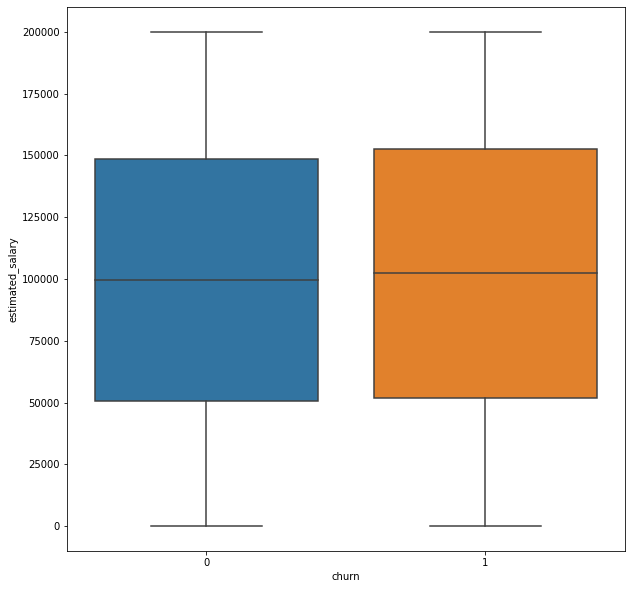

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x='churn', y='estimated_salary', data=df)

### Gender & Churn

<AxesSubplot:xlabel='gender', ylabel='count'>

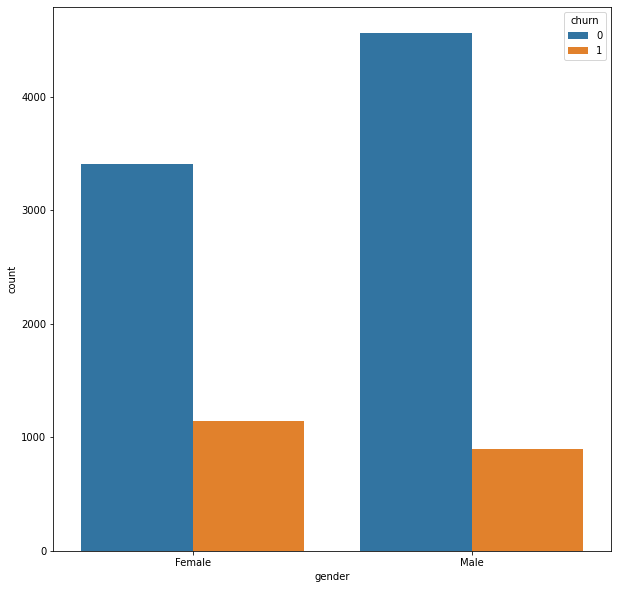

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x='gender',hue='churn',data=df)

### Country & Churn

<AxesSubplot:xlabel='country', ylabel='count'>

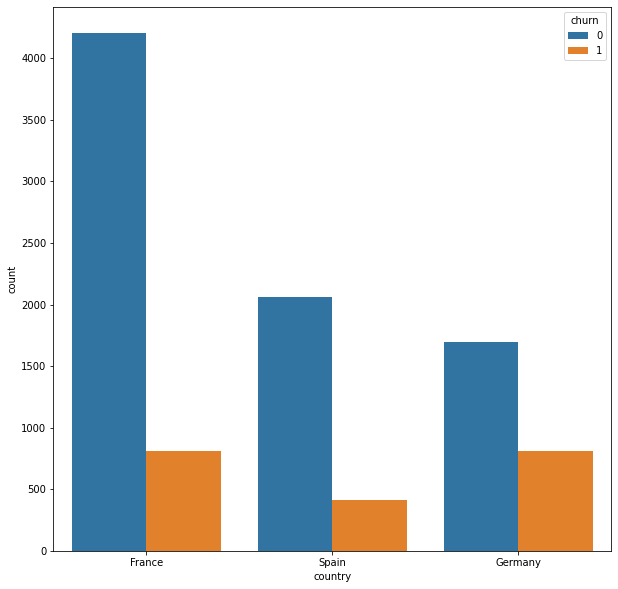

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', hue='churn', data=df)

### Credit Card & Churn

<AxesSubplot:xlabel='credit_card', ylabel='count'>

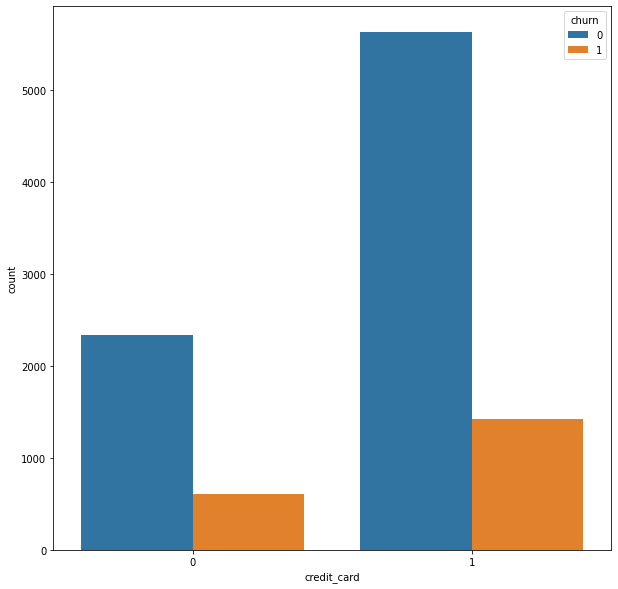

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='credit_card', hue='churn', data=df)

### Product Number & Churn

<AxesSubplot:xlabel='products_number', ylabel='count'>

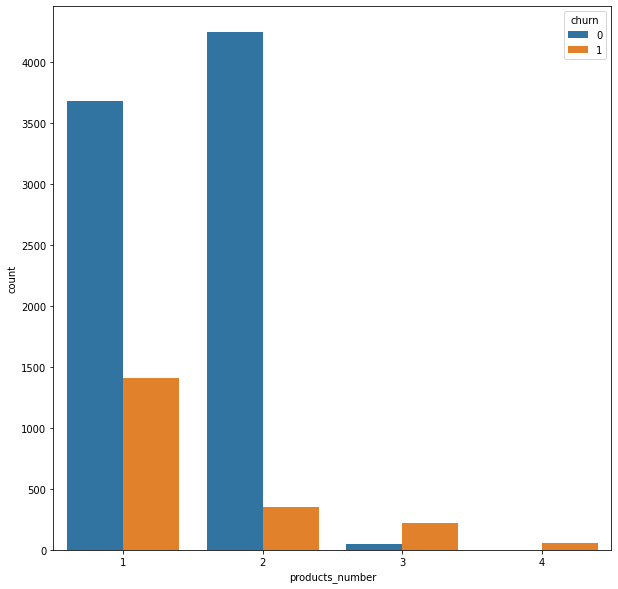

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x='products_number', hue='churn', data=df)

### Active Members & Churn

<AxesSubplot:xlabel='active_member', ylabel='count'>

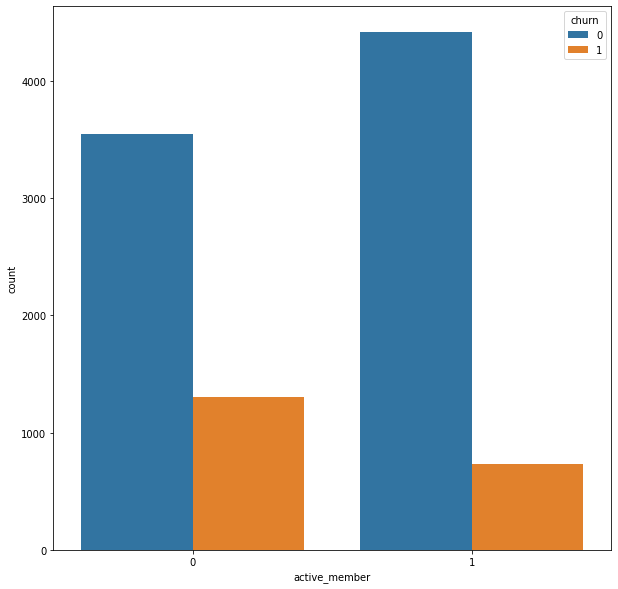

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='active_member', hue='churn', data=df)

### Tenure & Churn

<AxesSubplot:xlabel='tenure', ylabel='count'>

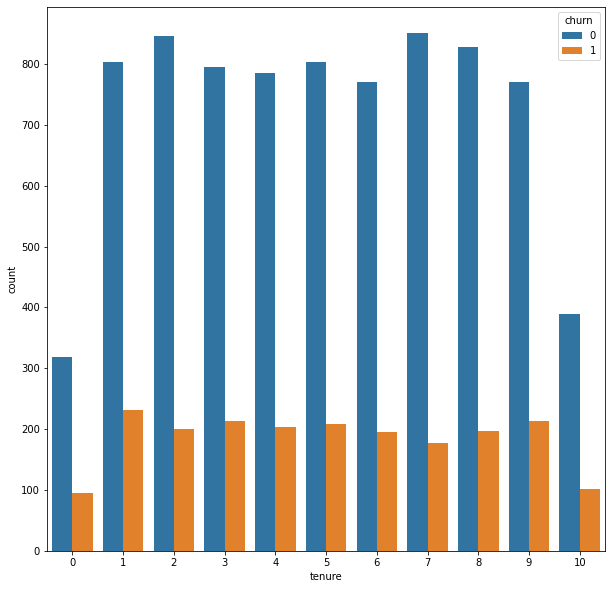

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='tenure', hue='churn', data=df)

## Handling Imbalance Data

In [22]:
#the following script allows us to split our data to 50% has 1 as churn value
#and other 50% has 0 as churn value
#so we can at least garuantee to have eqaule classes in the target variable

#lets store the index of rows that has 0 in the churn in a list

L = list(df[df['churn']==0].index)
rand_idx = random.sample(L,5926)

In [23]:
#lets drop those random indexes
df = df.drop(rand_idx)
df['churn'].value_counts()

1    2037
0    2037
Name: churn, dtype: int64

## Handling Categorical Data

### Gender & Country

In [24]:
df = pd.get_dummies(df, columns = ['country', 'gender'])

## Standardization

In [25]:
df.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler
vars_co = ['credit_score','age', 'tenure', 'balance','estimated_salary']
scaler = MinMaxScaler()
df[vars_co] = scaler.fit_transform(df[vars_co])

## Modeling: Logistic Regression with a Neural Network

In this part, I will build a logistic regression to predict whether a customer will churn or not using the Bank Customer Churn dataset on Kaggle.

### Overview of the problem
I will build a simple algorithm that can correctly classify either a certain customer will churn or not.

In [27]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,0.538,0.363636,0.2,0.000000,1,1,1,0.506895,1,1,0,0,1,0
2,15619304,0.304,0.363636,0.8,0.636357,3,1,0,0.569835,1,1,0,0,1,0
5,15574012,0.590,0.393939,0.8,0.453394,2,1,0,0.749034,1,0,0,1,0,1
7,15656148,0.052,0.166667,0.4,0.458540,4,1,0,0.596922,1,0,1,0,1,0
10,15767821,0.356,0.196970,0.6,0.406606,2,0,0,0.401013,0,1,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split
Y = df['churn'].values
X = df.drop(['churn','customer_id'], axis=1).values
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X, Y, test_size = 0.25, random_state = 10)

In [29]:
train_set_x

array([[0.854     , 0.60606061, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.814     , 0.59090909, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.42424242, 0.5       , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.61      , 0.42424242, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.846     , 0.68181818, 0.9       , ..., 1.        , 0.        ,
        1.        ],
       [0.538     , 0.34848485, 0.8       , ..., 0.        , 1.        ,
        0.        ]])

In [30]:
train_set_x = train_set_x.reshape((train_set_x.shape[1],train_set_x.shape[0]))
test_set_x = test_set_x.reshape((test_set_x.shape[1],test_set_x.shape[0]))
train_set_y = train_set_y.reshape((1,train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1,test_set_y.shape[0]))

In [31]:
train_set_y.shape

(1, 3055)

In [32]:
train_set_x.shape, test_set_x.shape

((13, 3055), (13, 1019))

### Training Examples and Testing Examples:
Lets find the values for: 
   + m_train (number of training examples)
   + m_test (number of test examples)

In [33]:
train_set_x.shape, test_set_x.shape

((13, 3055), (13, 1019))

In [34]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

Number of training examples: m_train = 13
Number of testing examples: m_test = 13


### General Architecture of the Learning Algorithms
#### Mathematical expression of the algorithm:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$


The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

##  Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)




### Helper functions


### sigmoid
Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

In [35]:
#sigmoif function

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

  
    s = 1/(1+np.exp(-z))
    
    
    return s

###  Initializing parameters


###  initialize_with_zeros
Implement parameter initialization in the cell below. I have to initialize w as a vector of zeros using np.zeros() in the Numpy library.

In [36]:
#initialize_with_zeros function


def initialize(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    
   
  
    b = 0
    w = np.zeros(shape=(dim,1))
    return w,b
    

    return w, b

In [37]:
w,b = initialize(train_set_x.shape[0])
w
b
w.shape

(13, 1)

In [38]:
train_set_x.shape

(13, 3055)

###  Forward and Backward propagation (Gradient Descent Algorithm)


Now that the parameters are initialized, I can do the "forward" and "backward" propagation steps for learning the parameters.

### - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**How**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

### -optimize
- I have initialized your parameters.
- I am also able to compute a cost function and its gradient.
- Now, I want to update the parameters using gradient descent.

<a name='ex-6'></a>
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [39]:
# gradient descent function

def gradient_descent(w,b,X,Y,num_iterations=10, learning_rate=0.01):
    costs = []
    m = X.shape[1]
    for i in range(num_iterations):
        z = np.dot(w.T,X) + b
        A = sigmoid(z)
        cost  = -(1/m)*(np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)))
        dz = A - Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i%100==0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
            #test = np.log(A)
    params = {'w':w,
              'b':b}
    return params, costs

###  predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [40]:
#predict function

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)
    
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        
    
    return Y_prediction

##  Merge all functions into a model ##

I will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

###  model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [41]:
#model function

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize parameters with zeros 
    w,b = initialize(X_train.shape[0])
        
    # Gradient descent 
    #parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    params,costs = gradient_descent(w,b,X_train,Y_train,num_iterations, learning_rate)
    # Retrieve parameters w and b from dictionary "parameters"
    w = params['w']
    b = params['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
   
    
    d = {"costs": costs,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### - Train the model
Lets train the model


In [42]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=0.6, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.691600
Cost after iteration 200: 0.691596
Cost after iteration 300: 0.691596
Cost after iteration 400: 0.691596
Cost after iteration 500: 0.691596
Cost after iteration 600: 0.691596
Cost after iteration 700: 0.691596
Cost after iteration 800: 0.691596
Cost after iteration 900: 0.691596
train accuracy: 51.391162029459906 %
test accuracy: 51.128557409224726 %


## Bank Chrun Prediction with one hidden layer

In the above code, I tried Logistic regression, and as you can see it did not perfomr that well. Next, I am going to train a Neural Netwok witha single hidden layer and see how that handles the same problem.
**The model**:
<img src="./classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

<a name='4-1'></a>
### Defining the neural network structure ####

<a name='ex-2'></a>
### - layer_sizes 

Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (**set this to 4, only for this Example **) 
    - n_y: the size of the output layer



In [43]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y 
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4
    return (n_x,n_h,n_y)

<a name='4-2'></a>
### Initialize the model's parameters ####

<a name='ex-3'></a>
###  initialize_parameters

Implement the function `initialize_parameters()`.

**Instructions**:
- I will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- I will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [44]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
    """
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.rand(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

<a name='4-3'></a>
### The Loop 

<a name='ex-4'></a>
### forward_propagation

Implement `forward_propagation()` using the following equations:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$


**Instructions**:

- Check the mathematical representation of your classifier in the figure above.
- Use the function `sigmoid()`. It's already implemented in this notebook.
- Use the function `np.tanh()`. It's part of the numpy library.
- Implement using these steps:
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [45]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

<a name='4-4'></a>
### Compute the Cost

Now that I have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

<a name='ex-5'></a>
###  - compute_cost 

Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. This is one way to implement one part of the equation without for loops:
$- \sum\limits_{i=1}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)          
```

- Use that to build the whole expression of the cost function.


In [46]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    m = Y.shape[1] #number of examples
    #compute the coss-ebtropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    return cost

<a name='ex-6'></a>
### -  backward_propagation

Implement the function `backward_propagation()`.

**Instructions**: I will use the six equations on the right of this slide, since I am building a vectorized implementation.  

<img src="./grad_summary.png" style="width:600px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Backpropagation. Use the six equations on the right.</font></center></caption>

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [47]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    #First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
    #Retrieve also A1 and A2 from dicionary 'cache'
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A2.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

<a name='ex-7'></a>
### - update_parameters

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

<img src="./sgd.gif" style="width:400;height:400;"> <img src="./sgd_bad.gif" style="width:400;height:400;">
<caption><center><font color='purple'><b>Figure 2</b>: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.</font></center></caption>

**Note**

- Use `copy.deepcopy(...)` when copying lists or dictionaries that are passed as parameters to functions. It avoids input parameters being modified within the function. In some scenarios, this could be inefficient, but it is required for grading purposes.


In [48]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 3):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    #Retrieve a copy of each parameter from the dicionary "parameters"
    W1 = copy.deepcopy(parameters['W1'])
    W2 = copy.deepcopy(parameters['W2'])
    b1 = copy.deepcopy(parameters['b1'])
    b2 = copy.deepcopy(parameters['b2'])
    
    #Retrieve each gradient from dictionary "grads"
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    #Update for each parameter
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters
    

<a name='4-7'></a>
### - Integration

I will Integrate the above functions in `nn_model()` 

<a name='ex-8'></a>
### - nn_model

Building a neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [49]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False, learning_rate=1.2):
    """
    Arguments:
    X -- dataset 
    Y -- labels 
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    #Initialize parameters
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    costs = []
    
    #Loop (gradient descent)
    for i in range(0,num_iterations):
        #Forward propagation
        A2, cache = forward_propagation(X,parameters)
        
        #Cost function
        cost = compute_cost(A2,Y)
        
        #Backpropagation
        grads = backward_propagation(parameters,cache,X,Y)
        
        #Gradient descent parameters upadte
        parameters = update_parameters(parameters,grads,learning_rate)
        
        #print the cost every 1000 iterations
        if print_cost and i % 1000 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 1000 == 0 or i == num_iterations:
            costs.append(cost)
            
    return parameters, costs


In [50]:
def costs_plot(costs, learning_rate=0.01):
    """
    Arguments
        costs -- it is a list that contains the values of cost of the model during the training phase
        learning_rate -- the learning rate of the model
    """
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousands)')
    plt.title('Learning rate ='+ str(learning_rate))
    plt.show()

<a name='5'></a>
## Test the Model

<a name='5-1'></a>
### - Predict

Predict with the model by building `predict()`.
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [51]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    A2, cache = forward_propagation(X,parameters)
    predictions = np.round(A2)
    
    return predictions

### -Evaluating
How can we measure the effectiveness of our model. Better the effectiveness, better the performance, and this is exactly what we want. So, here where the role of confusion matrix comes into the limelight.
Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

<img src="./confusion_matrix.png" style="width:600px;height:300px;">

In the following part, I will build a function that takes a confusion matrix of a certain model as an input, and it calculate different measurement such as recall, precision, and f1 score from scratch.

Let’s understand TP, FP, FN, TN in terms of pregnancy analogy.

<img src="./confusion_matrix_example.png" style="width:600px;height:300px;">


**True Positive:**

    - Interpretation: You predicted positive and it’s true.

    - You predicted that a woman is pregnant and she actually is.

**True Negative:**

    - Interpretation: You predicted negative and it’s true.

    - You predicted that a man is not pregnant and he actually is not.

**False Positive: (Type 1 Error)**

    - Interpretation: You predicted positive and it’s false.

    - You predicted that a man is pregnant but he actually is not.

**False Negative: (Type 2 Error)**

    - Interpretation: You predicted negative and it’s false.

    - You predicted that a woman is not pregnant but she actually is.

Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.

<img src="./confusion_matrix_example2.png" style="width:600px;height:300px;">



In [52]:
def evaluate(confusion_martix):
    """
    Arguments:
    
    confusion_matrix -- it is the confusion matrix of the model
    
    recall -- it can be explained by saying, from all the positive classes, how many we predicted correctly.
    precision -- it can be explained by saying, from all the classes we have predicted as positive, how many are actually positive.
    f1_score -- it helps to measure Recall and Precision at the same time
    """
    TP = confusion_martix[0,0]
    FP = confusion_martix[0,1]
    FN = confusion_martix[1,0]
    TN = confusion_martix[1,1]
    
    recall = (TP)/(TP+FN)
    precision = TP/(TP+FP)
    f1_score = (2*recall*precision)/(recall+precision)
    print("recall: %f | precision: %f | f1_score: %f" %(recall,precision,f1_score))

<a name='5-2'></a>
### 5.2 - Test the Model on the Bank Churn Dataset

It's time to run the model and see how it performs on a Bank Churn dataset. By running the following code we will test the model with a single hidden layer of $n_h$ hidden units!. Furthermore, to see how the model performance in different cases, I will run different test by changing the number of iteration and learning rate, so we can see how those parameters affect on the model training perfermance.

### Test: #1
In this test, I will use 10000 iterations and leraning rate equals to 1.2

In [53]:
# Build a model with a n_h-dimensional hidden layer
parameters, costs = nn_model(train_set_x, train_set_y, n_h = 20, num_iterations = 10000, print_cost=True, learning_rate=1.2)


Cost after iteration 0: 0.6931565983183068
Cost after iteration 1000: 0.6916017143844675
Cost after iteration 2000: 0.6915569408053556
Cost after iteration 3000: 0.6906672603626592
Cost after iteration 4000: 0.6873764577651327
Cost after iteration 5000: 0.6777208672973464
Cost after iteration 6000: 0.6608093818148031
Cost after iteration 7000: 0.6448750053963397
Cost after iteration 8000: 0.6313568927774262
Cost after iteration 9000: 0.620253778145935
Cost after iteration 9999: 0.6129220283581401


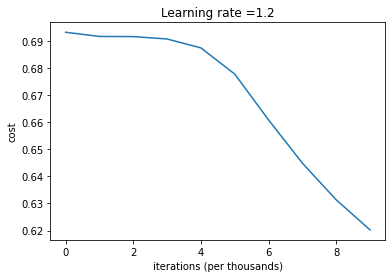

In [54]:
costs_plot(costs,1.2)

In [55]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('test accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 65.270049%
test accuracy: 49.852797%


In [56]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [57]:
cm_1_1 = confusion_matrix(a_t_y, a_p_y)

In [58]:
cm_1_1

array([[1101,  429],
       [ 632,  893]], dtype=int64)

In [59]:
evaluate(cm_1_1)

recall: 0.635314 | precision: 0.719608 | f1_score: 0.674839


### Test: #2
I will use 10000 iterations and learning rate equales to 2

In [60]:
# Build a model with a n_h-dimensional hidden layer
parameters, costs = nn_model(train_set_x, train_set_y, n_h = 20, num_iterations = 10000, print_cost=True,learning_rate=2)


Cost after iteration 0: 0.6931565983183068
Cost after iteration 1000: 0.6915855317363986
Cost after iteration 2000: 0.6887815161527955
Cost after iteration 3000: 0.6755041571808927
Cost after iteration 4000: 1.0711669605176042
Cost after iteration 5000: 0.6648674924442884
Cost after iteration 6000: 0.653765493740741
Cost after iteration 7000: 0.6479878615318758
Cost after iteration 8000: 0.6430342383392255
Cost after iteration 9000: 0.6449935350810196
Cost after iteration 9999: 0.693124655403622


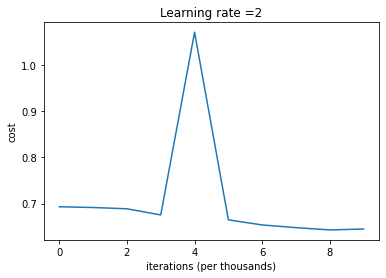

In [61]:
costs_plot(costs,2)

In [62]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('test accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 50.638298%
test accuracy: 49.165849%


In [63]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [64]:
cm_1_2 = confusion_matrix(a_t_y, a_p_y)

In [65]:
evaluate(cm_1_2)

recall: 0.503909 | precision: 0.926797 | f1_score: 0.652855


### Test: #3
I will use 20000 iterations and learning rate equals to 2

In [66]:
# Build a model with a n_h-dimensional hidden layer
parameters, costs = nn_model(train_set_x, train_set_y, n_h = 20, num_iterations = 20000, print_cost=True,learning_rate=2)


Cost after iteration 0: 0.6931565983183068
Cost after iteration 1000: 0.6915855317363986
Cost after iteration 2000: 0.6887815161527955
Cost after iteration 3000: 0.6755041571808927
Cost after iteration 4000: 1.0711669605176042
Cost after iteration 5000: 0.6648674924442884
Cost after iteration 6000: 0.653765493740741
Cost after iteration 7000: 0.6479878615318758
Cost after iteration 8000: 0.6430342383392255
Cost after iteration 9000: 0.6449935350810196
Cost after iteration 10000: 0.6931249715577398
Cost after iteration 11000: 0.6931451800992238
Cost after iteration 12000: 0.6931451834632361
Cost after iteration 13000: 0.6931451872243607
Cost after iteration 14000: 0.6931451913039656
Cost after iteration 15000: 0.693145195639518
Cost after iteration 16000: 0.6931452002222053
Cost after iteration 17000: 0.6931452051227743
Cost after iteration 18000: 0.6931452104967064
Cost after iteration 19000: 0.6931452165666442
Cost after iteration 19999: 0.6931452235832847


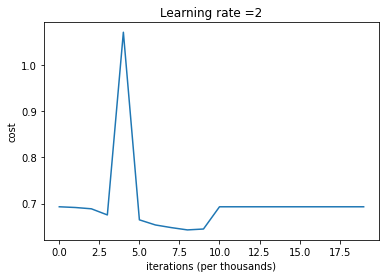

In [67]:
costs_plot(costs,2)

In [68]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('test accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 50.801964%
test accuracy: 49.263984%


In [69]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [70]:
cm_1_3 = confusion_matrix(a_t_y, a_p_y)

In [71]:
evaluate(cm_1_3)

recall: 0.504722 | precision: 0.943137 | f1_score: 0.657553


### Dicussing the results
As we can see, the algorithm is working well in terms of implementing different functions of the model. Concerning the evaluation part, we can clearly see there is an improvement related to the fact of changing some parameters such as number of iteration and / or learning rate. So, to make the model works perfectly, we need to do an optimization process based on the hyperparameters. Unfortunately, I will not focus on the optimization part in this project, but I may work on it in the future. 

## Bank Churn using Multiple Hidden Layers

In this part, I will build a deep neural network with as many layers as you want!

- In the following, I will implement all the functions required to build a deep neural network.

**By the end of this part, I will be able to:**

- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).


<a name='2'></a>
## 2 - Outline

To build a neural network, I will be implementing several "helper functions." These helper functions will be used to build an L-layer neural network. 

Each small helper function will have detailed instructions. Here's an outline of the steps in this assignment:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network
- Implement the forward propagation module (shown in purple in the figure below)
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - The ACTIVATION function is provided for you (relu/sigmoid)
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss
- Implement the backward propagation module (denoted in red in the figure below)
    - Complete the LINEAR part of a layer's backward propagation step
    - The gradient of the ACTIVATE function is provided for you(relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally, update the parameters

<img src="./final outline.png" style="width:800px;height:500px;">
<caption><center><b>Figure 1</b></center></caption><br>


**Note**:

For every forward function, there is a corresponding backward function. This is why at every step of your forward module you will be storing some values in a cache. These cached values are useful for computing gradients. 

In the backpropagation module, you can then use the cache to calculate the gradients. Don't worry, this assignment will show you exactly how to carry out each of these steps! 

<a name='3'></a>
## 3 - Initialization

I will write a helper function to initialize the parameters for the model. 
<a name='3-2'></a>
### 3.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep` function, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. For example, if the size of your input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> <b>Shape of W</b> </td> 
        <td> <b>Shape of b</b>  </td> 
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td> 
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   <tr>
   <tr>
       <td> <b>Layer L</b> </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

Remember that when you compute $W X + b$ in python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    w_{00}  & w_{01} & w_{02} \\
    w_{10}  & w_{11} & w_{12} \\
    w_{20}  & w_{21} & w_{22} 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    x_{00}  & x_{01} & x_{02} \\
    x_{10}  & x_{11} & x_{12} \\
    x_{20}  & x_{21} & x_{22} 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    b_0  \\
    b_1  \\
    b_2
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (w_{00}x_{00} + w_{01}x_{10} + w_{02}x_{20}) + b_0 & (w_{00}x_{01} + w_{01}x_{11} + w_{02}x_{21}) + b_0 & \cdots \\
    (w_{10}x_{00} + w_{11}x_{10} + w_{12}x_{20}) + b_1 & (w_{10}x_{01} + w_{11}x_{11} + w_{12}x_{21}) + b_1 & \cdots \\
    (w_{20}x_{00} + w_{21}x_{10} + w_{22}x_{20}) + b_2 &  (w_{20}x_{01} + w_{21}x_{11} + w_{22}x_{21}) + b_2 & \cdots
\end{bmatrix}\tag{3}  $$


<a name='ex-2'></a>
### -  initialize_parameters_deep

Implement initialization for an L-layer Neural Network. 

**Instructions**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(d0, d1, ..., dn) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- You'll store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for last week's Planar Data classification model would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [72]:
#FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

<a name='4'></a>
## - Forward Propagation Module

<a name='4-1'></a>
### - Linear Forward 

Now that I have initialized the parameters, I can do the forward propagation module. Start by implementing some basic functions that you can use again later when implementing the model. Now, you'll complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

<a name='ex-3'></a>
### - linear_forward 

Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help.

In [73]:
#FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
  
    Z = np.dot(W,A) + b
    cache = (A, W, b)
    
    return Z, cache

<a name='4-2'></a>
### - Linear-Activation Forward

In this part of the project, I will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. You've been provided with the `sigmoid` function which returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. You've been provided with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what you'll feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

For added convenience, you're going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you'll implement a function that does the LINEAR forward step, followed by an ACTIVATION forward step.

<a name='ex-4'></a>
### - linear_activation_forward

Implement the forward propagation of the *LINEAR->ACTIVATION* layer. Mathematical relation is: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu(). Use `linear_forward()` and the correct activation function.

In [74]:
#Function: Relu
def relu(Z):
    A = np.maximum(0, Z)
    return A, Z

In [75]:
def sigmoid_l(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

In [76]:
#FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid_l(Z)
        
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

**Note**: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers. 

<a name='4-3'></a>
### - L-Layer Model 

For even *more* convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

<img src="./model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> <b>Figure 2</b> : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>

<a name='ex-5'></a>
### -  L_model_forward

Implement the forward propagation of the above model.

**Instructions**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 


In [77]:
#FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    # The for loop starts at 1 because layer 0 is the input
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)],'relu')
        caches.append(cache)
        
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)],'sigmoid')
    caches.append(cache)
    
          
    return AL, caches

<a name='5'></a>
## - Cost Function

Now I can implement forward and backward propagation! I need to compute the cost, in order to check whether the model is actually learning.

<a name='ex-6'></a>
### - compute_cost
Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [78]:
#FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    logprobs = np.multiply(np.log(AL),Y) + np.multiply((1-Y),np.log(1-AL))
    cost = - np.sum(logprobs) / m
    
    
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).

    
    return cost

<a name='6'></a>
## - Backward Propagation Module

Just as I did for the forward propagation, I will implement helper functions for backpropagation. Remember that backpropagation is used to calculate the gradient of the loss function with respect to the parameters. 

**Reminder**: 
<img src="./backprop_kiank.png" style="width:650px;height:250px;">
<caption><center><font color='purple'><b>Figure 3</b>: Forward and Backward propagation for LINEAR->RELU->LINEAR->SIGMOID <br> <i>The purple blocks represent the forward propagation, and the red blocks represent the backward propagation.</font></center></caption>


<!-- 
For those of you who are experts in calculus (which you don't need to be to do this assignment!), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

Now, similarly to forward propagation, I am going to build the backward propagation in three steps:
1. LINEAR backward
2. LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
3. [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

<a name='6-1'></a>
### - Linear Backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose I have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

<img src="./linearback_kiank.png" style="width:250px;height:300px;">
<caption><center><font color='purple'><b>Figure 4</b></font></center></caption>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$. 

<a name='ex-7'></a>
### - linear_backward 

Use the 3 formulas above to implement `linear_backward()`.

In [79]:
#FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    
    return dA_prev, dW, db

<a name='6-2'></a>
### - Linear-Activation Backward

Next, I will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, two backward functions have been provided:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). \tag{11}$$  

<a name='ex-8'></a>
### -  linear_activation_backward

Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [80]:
def sigmoid_backward(dA, cache):
    """
    The backward propagation for a single SIGMOID unit.
    Arguments:
    dA - post-activation gradient, of any shape
    cache - 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ - Gradient of the cost with respect to Z
    """
    Z = cache 
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ


In [81]:
def relu_backward(dA, cache):
    """
    The backward propagation for a single RELU unit.
    Arguments:
    dA - post-activation gradient, of any shape
    cache - 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ - Gradient of the cost with respect to Z
    """
    Z = cache
    # just converting dz to a correct object.
    dZ = np.array(dA, copy=True)
    # When z <= 0, we should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    return dZ

In [82]:
#FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

<a name='6-3'></a>
### - L-Model Backward 

Now I will implement the backward function for the whole network! 

Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you'll use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you'll iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure 5 below shows the backward pass. 


<img src="./mn_backward.png" style="width:450px;height:300px;">
<caption><center><font color='purple'><b>Figure 5</b>: Backward pass</font></center></caption>

**Initializing backpropagation**:

To backpropagate through this network, you know that the output is: 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula (derived using calculus which, again, you don't need in-depth knowledge of!):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. As seen in Figure 5, you can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). 

After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

<a name='ex-9'></a>
### -  L_model_backward

Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [83]:
#FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads['dA' + str(l)] = dA_prev_temp
        grads['dW' + str(l+1)] = dW_temp
        grads['db' + str(l+1)] = db_temp
        
    return grads

<a name='6-4'></a>
### - Update Parameters

In this section, I will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. 

After computing the updated parameters, store them in the parameters dictionary. 

<a name='ex-10'></a>
### - update_parameters

Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 

In [84]:
#FUNCTION: update_parameters

def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - learning_rate*grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate*grads['db'+str(l+1)]
        
    return parameters

<a name='ex-2'></a>
### - L_layer_model 

Use the helper functions I implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [85]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 5, num_iterations = 5000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
        
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
                
        # Print the cost every 100 iterations
        if print_cost and i % 1000 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 1000 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

### - Predict

In [86]:
#FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model
    """
    AL, cache = L_model_forward(X, parameters)
    predictions = np.round(AL)
    
    return predictions

<a name='5-1'></a>
### - Train the model 
It's time to run the model and see how it performs on a Bank Churn dataset. By running the following code I will test the model with multiple hidden layer of $n_h$ hidden units!. Furthermore, to see how the model performance in different cases, I will run different test by changing the number of iteration, learning rate, number of hidden layer, and number of units in each layer so we can see how those parameters affect on the model training perfermance.

### Test: #1
In this test, I will use 4000 iterations, learning rate equales to 2, 2 hidden layers of dims of 20 and 15

In [87]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],20,15,1], learning_rate=2,num_iterations = 4000, print_cost = True)

Cost after iteration 0: 0.6931471851276612
Cost after iteration 1000: 0.691785590551995
Cost after iteration 2000: 0.660452675315226
Cost after iteration 3000: 0.6125166199363477
Cost after iteration 3999: 0.5439315714492222


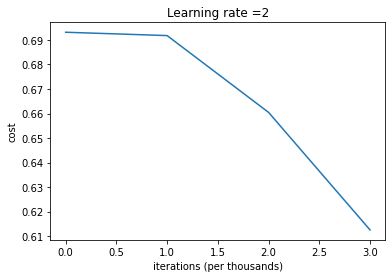

In [88]:
costs_plot(costs,2)

In [89]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 70.310966%
train accuracy: 52.109912%


In [90]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [91]:
cm_n_1 = confusion_matrix(a_t_y, a_p_y)

In [92]:
cm_n_1

array([[1067,  463],
       [ 444, 1081]], dtype=int64)

In [93]:
evaluate(cm_n_1)

recall: 0.706155 | precision: 0.697386 | f1_score: 0.701743


### Test: #2
I will use 4000 iterations, learning rate equals to 1.2, 2 hidden layers of dims 20 and 15

In [94]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],20,15,1], learning_rate=1.2,num_iterations = 4000, print_cost = True)

Cost after iteration 0: 0.6931471851276612
Cost after iteration 1000: 0.693135622175311
Cost after iteration 2000: 0.6899303790413739
Cost after iteration 3000: 0.6636249132913425
Cost after iteration 3999: 0.6328099491816883


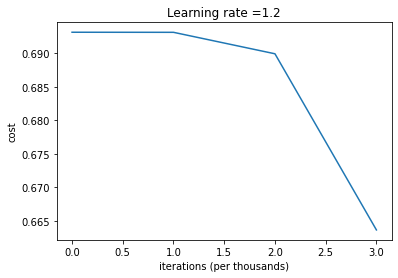

In [95]:
costs_plot(costs,1.2)

In [96]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 61.767594%
train accuracy: 51.815505%


In [97]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [98]:
cm_n_2 = confusion_matrix(a_t_y, a_p_y)

In [99]:
evaluate(cm_n_2)

recall: 0.722359 | precision: 0.384314 | f1_score: 0.501706


### Test: #3
I will use 6000 iterations, learning rate equals to 1.2, and 2 hidden layers of dims 20 and 15

In [100]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],20,15,1], learning_rate=1.2,num_iterations = 6000, print_cost = True)

Cost after iteration 0: 0.6931471851276612
Cost after iteration 1000: 0.693135622175311
Cost after iteration 2000: 0.6899303790413739
Cost after iteration 3000: 0.6636249132913425
Cost after iteration 4000: 0.6398550234693594
Cost after iteration 5000: 0.6164641530419641
Cost after iteration 5999: 0.5604789312631625


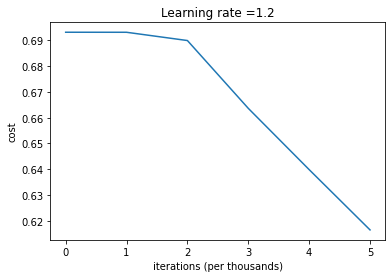

In [101]:
costs_plot(costs,1.2)

In [102]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 67.659574%
train accuracy: 52.109912%


In [103]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [104]:
cm_n_3 = confusion_matrix(a_t_y, a_p_y)

In [105]:
evaluate(cm_n_3)

recall: 0.782881 | precision: 0.490196 | f1_score: 0.602894


### Test: #4
I will use 6000 iterations, learning rate eqauls to 1.2, and 2 hidden layers of 25 and 20 dims.

In [106]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],25,20,1], learning_rate=1.2,num_iterations = 6000, print_cost = True)

Cost after iteration 0: 0.6931473391384972
Cost after iteration 1000: 0.6931377383084416
Cost after iteration 2000: 0.6903444615952667
Cost after iteration 3000: 0.6659372388989211
Cost after iteration 4000: 0.6192632949150291
Cost after iteration 5000: 0.6154006904432403
Cost after iteration 5999: 0.513740473134194


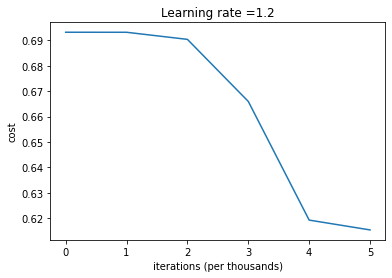

In [107]:
costs_plot(costs,1.2)

In [108]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 72.896890%
train accuracy: 53.091266%


In [109]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [110]:
cm_n_4 = confusion_matrix(a_t_y, a_p_y)

In [111]:
evaluate(cm_n_4)

recall: 0.811723 | precision: 0.597386 | f1_score: 0.688253


### Test: #5
I will use 6000 iterations, learning rate equals to 1.2, and 3 hidden layers of dims 25, 20, and 10

In [112]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],25,20,10,1], learning_rate=1.2,num_iterations = 6000, print_cost = True)

Cost after iteration 0: 0.6931471878671974
Cost after iteration 1000: 0.6931458431029841
Cost after iteration 2000: 0.693145842153495
Cost after iteration 3000: 0.6931458412259195
Cost after iteration 4000: 0.6931458402563877
Cost after iteration 5000: 0.6931458391885407
Cost after iteration 5999: 0.6931458380702786


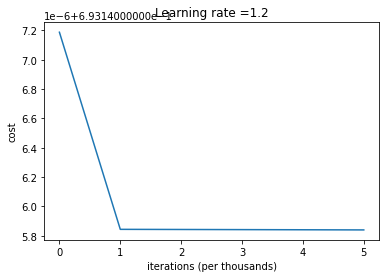

In [113]:
costs_plot(costs,1.2)

In [114]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 50.081833%
train accuracy: 49.754661%


In [115]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [116]:
cm_n_5 = confusion_matrix(a_t_y, a_p_y)

In [117]:
evaluate(cm_n_5)

recall: 0.500818 | precision: 1.000000 | f1_score: 0.667394


### Test: #6
I will use 6000 iterations, learning rate equals to 1.8, and 3 hidden layers of size 25,20,10

In [118]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],25,20,10,1], learning_rate=1.8,num_iterations = 6000, print_cost = True)

Cost after iteration 0: 0.6931471878671974
Cost after iteration 1000: 0.6931458404451295
Cost after iteration 2000: 0.6931458385311016
Cost after iteration 3000: 0.6931458367701869
Cost after iteration 4000: 0.693145834893259
Cost after iteration 5000: 0.6931458328639474
Cost after iteration 5999: 0.6931458305916163


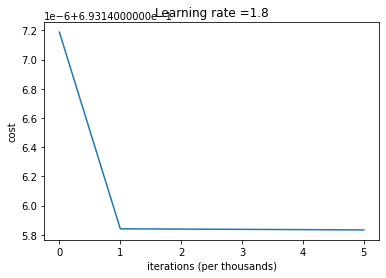

In [119]:
costs_plot(costs,1.8)

In [120]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 50.081833%
train accuracy: 49.754661%


In [121]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [122]:
cm_n_6 = confusion_matrix(a_t_y, a_p_y)

In [123]:
evaluate(cm_n_6)

recall: 0.500818 | precision: 1.000000 | f1_score: 0.667394


### Test: #7
I will use 80000 iterations, learning rate equals to 1.2, and 2 hidden layers of size 10 and 7

In [124]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],10,7,1], learning_rate=1.2,num_iterations = 80000, print_cost = True)

Cost after iteration 0: 0.69314718748374
Cost after iteration 1000: 0.693145815574984
Cost after iteration 2000: 0.69314570392856
Cost after iteration 3000: 0.6931452899409326
Cost after iteration 4000: 0.6931378059348206
Cost after iteration 5000: 0.6904867100341612
Cost after iteration 6000: 0.6698549836431338
Cost after iteration 7000: 0.6587636469160003
Cost after iteration 8000: 0.6524847062519872
Cost after iteration 9000: 0.6435621480641754
Cost after iteration 10000: 0.6385642260985636
Cost after iteration 11000: 0.6307576539502499
Cost after iteration 12000: 0.628081972351922
Cost after iteration 13000: 0.6320538675379666
Cost after iteration 14000: 0.625191299248827
Cost after iteration 15000: 0.6143439993335076
Cost after iteration 16000: 0.6142476554419797
Cost after iteration 17000: 0.6171951907789649
Cost after iteration 18000: 0.6198587454681495
Cost after iteration 19000: 0.6145158501530231
Cost after iteration 20000: 0.6116559414773535
Cost after iteration 21000: 0.608

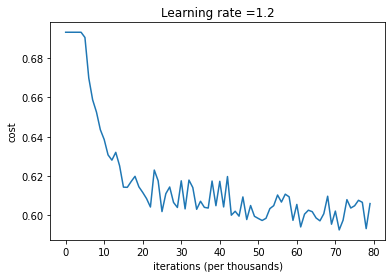

In [125]:
costs_plot(costs,1.2)

In [126]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 66.350245%
train accuracy: 49.263984%


In [127]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [128]:
cm_n_7 = confusion_matrix(a_t_y, a_p_y)

In [129]:
cm_n_7

array([[ 815,  715],
       [ 313, 1212]], dtype=int64)

In [130]:
evaluate(cm_n_7)

recall: 0.722518 | precision: 0.532680 | f1_score: 0.613243


### Test: #8
I will use 80000 iterations, learning rate equals to 0.7, and 2 hidden layers of size 10 and 7

In [131]:
# 4-layers model
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims=[train_set_x.shape[0],10,7,1], learning_rate=0.7,num_iterations = 80000, print_cost = True)

Cost after iteration 0: 0.69314718748374
Cost after iteration 1000: 0.6931458250846405
Cost after iteration 2000: 0.6931458122705891
Cost after iteration 3000: 0.6931457567880771
Cost after iteration 4000: 0.6931456807350687
Cost after iteration 5000: 0.6931454995771733
Cost after iteration 6000: 0.6931448763609962
Cost after iteration 7000: 0.6931409325390072
Cost after iteration 8000: 0.6930396384725416
Cost after iteration 9000: 0.6899028012209741
Cost after iteration 10000: 0.6736321882502025
Cost after iteration 11000: 0.6687957218931159
Cost after iteration 12000: 0.6628652720809287
Cost after iteration 13000: 0.6546797734399387
Cost after iteration 14000: 0.6460751930527698
Cost after iteration 15000: 0.6416573199147085
Cost after iteration 16000: 0.6388414610184313
Cost after iteration 17000: 0.6314394473667235
Cost after iteration 18000: 0.6384205007815767
Cost after iteration 19000: 0.6342854577013382
Cost after iteration 20000: 0.6428643220788456
Cost after iteration 21000: 

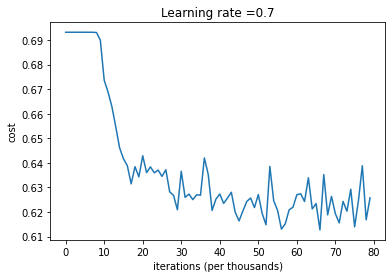

In [132]:
costs_plot(costs,0.7)

In [133]:
# Print accuracy
predictions_train = predict(parameters, train_set_x)
predictions_test = predict(parameters, test_set_x)
print ('train accuracy: %f' % float((np.dot(train_set_y, predictions_train.T) + np.dot(1 - train_set_y, 1 - predictions_train.T)) / float(train_set_y.size) * 100) + '%')
print ('train accuracy: %f' % float((np.dot(test_set_y, predictions_test.T) + np.dot(1 - test_set_y, 1 - predictions_test.T)) / float(test_set_y.size) * 100) + '%')

train accuracy: 63.207856%
train accuracy: 51.815505%


In [134]:
#lets reshape the training set of Y and predictio set Y, so we can use it in the confusion matrix
a_t_y = np.reshape(train_set_y,(train_set_y.shape[1],)) 
a_p_y = np.reshape(predictions_train, (predictions_train.shape[1],))

In [135]:
cm_n_8 = confusion_matrix(a_t_y, a_p_y)

In [136]:
cm_n_8

array([[1214,  316],
       [ 808,  717]], dtype=int64)

In [137]:
evaluate(cm_n_8)

recall: 0.600396 | precision: 0.793464 | f1_score: 0.683559


### Discussing the results
The idea behind all this number of test is to see how my model behaves in different use cases. In, general, the model works good in terms of implementing different function, but **it still has a weak perfermance**. Moreover, to inhance the performance, I need to work, as I said previously, on an optimization process that is linked directly to the hyperparameters such as number of iterations, learning rate, number of hidden layers, the size of each layer...

## Additional Things: Working with tanh as an activation function for hidden layers